In [439]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import sys
import matplotlib.pyplot as plt
import subprocess
from importlib import reload
from typing import List, Tuple, Dict, Any
import json
import sys
from scipy.stats import ttest_ind
from importlib import reload

sys.path.insert(0, '/opt/project')
import dataprep.utils as dutils
import dataprep.graph as dgr
import scripts.plot_results as evaldqn
import evaluation.plotutils as plutils
import layers.datasets as ds
import layers.vnfmodel as vnfmod

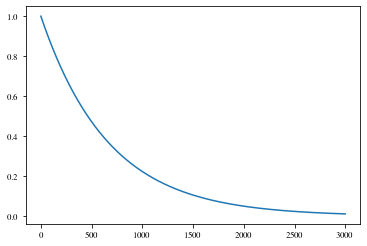

In [786]:
plt.plot(np.clip(np.power(0.9985, np.arange(3000)), 1e-3, 5))

In [737]:
plt.rcParams.update({
    "font.size": 9,
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": ["Times"]})

Text(0.5, 0, 'LB\\textsubscript{LB}')

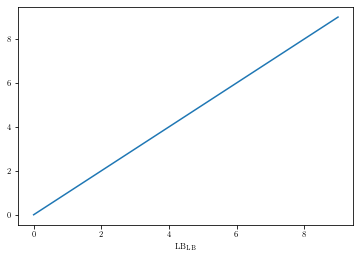

In [669]:
ax = plt.subplot()
ax.plot(np.arange(10))
ax.set_xlabel("LB\\textsubscript{LB}")

In [746]:
plutils.COLORS

['#e41a1c',
 '#377eb8',
 '#4daf4a',
 '#984ea3',
 '#ff7f00',
 '#ffff33',
 '#a65628',
 '#f781bf']

<BarContainer object of 8 artists>

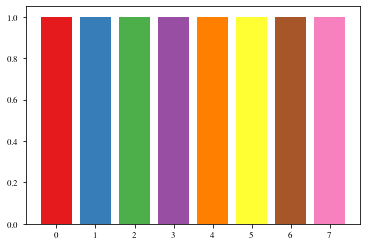

In [745]:
plt.bar(np.arange(len(plutils.COLORS)), height=np.ones(len(plutils.COLORS)), color=plutils.COLORS)

In [671]:
reload(plutils)
reload(evaldqn)

<module 'scripts.plot_results' from '/opt/project/scripts/plot_results.py'>

In [470]:
np.sum([len(v) for k, v in all_graphs.items() if k.find('DT') == -1])

2699

In [334]:
all_graphs['LLF-100-1'][0].graph

{'path': '/opt/project/data/nas/dqn_assignments_result/least-loaded-first-l100-1-mpps/dqn_eval-p0053-i00'}

In [477]:
all_graphs['LLF-100-1'][0].nodes[48]

{'node_type': 'vnf',
 'index': 48,
 'name': 'vnf_1_6',
 'position': 7,
 'throughput': 341138.86113886116,
 'arrival_rate': 363408.0,
 'cost': 1003.0,
 'demand': 364498224.0,
 'ratio': 1.0}

In [344]:
all_graphs['LLF-100-1'][0].nodes(data=True)

NodeDataView({0: {'node_type': 'socket', 'index': 0, 'name': 'socket_0'}, 7: {'node_type': 'cpu', 'index': 7, 'name': 'cpu_0', 'cost': 0, 'arrival_rate': 0, 'demand': 0, 'min_ratio': -1, 'max_ratio': -1, 'ratio_ratio': -1}, 8: {'node_type': 'cpu', 'index': 8, 'name': 'cpu_1', 'cost': 0, 'arrival_rate': 0, 'demand': 0, 'min_ratio': -1, 'max_ratio': -1, 'ratio_ratio': -1}, 9: {'node_type': 'cpu', 'index': 9, 'name': 'cpu_2', 'cost': 0, 'arrival_rate': 0, 'demand': 0, 'min_ratio': -1, 'max_ratio': -1, 'ratio_ratio': -1}, 10: {'node_type': 'cpu', 'index': 10, 'name': 'cpu_3', 'cost': 0, 'arrival_rate': 0, 'demand': 0, 'min_ratio': -1, 'max_ratio': -1, 'ratio_ratio': -1}, 11: {'node_type': 'cpu', 'index': 11, 'name': 'cpu_4', 'cost': 0, 'arrival_rate': 0, 'demand': 0, 'min_ratio': -1, 'max_ratio': -1, 'ratio_ratio': -1}, 12: {'node_type': 'cpu', 'index': 12, 'name': 'cpu_5', 'cost': 110.0, 'arrival_rate': 999998.0, 'demand': 109999780.0, 'min_ratio': 1.0, 'max_ratio': 1.0, 'ratio_ratio': 0.

# Obtain Data

In [50]:
results = evaldqn.eval_test_runs('rc')
with open("/opt/project/data/moongen-throughput-results-rc.json", 'w') as fh:
    json.dump(results, fh)
results = {k: np.array(v) for k, v in results.items()}

No objects to concatenate
Traceback (most recent call last):
  File "/opt/project/scripts/plot_results.py", line 152, in load_algo_results
    dfs.append(dutils.load_moongen_thoughput(os.path.join(path, f)))
  File "/opt/project/dataprep/utils.py", line 469, in load_moongen_thoughput
    return pd.concat(dfs, axis=0)
  File "/opt/conda/lib/python3.8/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/concat.py", line 294, in concat
    op = _Concatenator(
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/concat.py", line 351, in __init__
    raise ValueError("No objects to concatenate")
ValueError: No objects to concatenate
No objects to concatenate
Traceback (most recent call last):
  File "/opt/project/scripts/plot_results.py", line 152, in load_algo_results
    dfs.append(dutils.load_moongen_thoughput(os.path.join(path, f)))
  File "/opt/project/dataprep/u

In [52]:
results_rc = results

In [53]:
{k: np.mean(v) for k, v in results_rc.items()}

{'FFD-70-2.5': 2151543.7029999997,
 'FFD-100-2.5': 1818357.6840000006,
 'RL-1N-1': 920656.5809999998,
 'FFD-85-1': 849600.443,
 'GEN-70-2.5': 2146611.153,
 'RL-LB-1N-2.5': 2313338.61,
 'FFD-100-1': 783630.5930000001,
 'RL-LB-1N-2.5-fail': 2095994.5910000002,
 'RL-LB-1N-DT-2.5': 2317784.8049999997,
 'LLFD-100-1': 934989.0490000001,
 'LLFD-100-2.5': 2329479.943,
 'FFD-90-2.5': 1960103.564,
 'RL-1N-DT2-2.5': 2321065.611,
 'GEN-70-1': 935005.535,
 'FFD-95-1': 815602.2440000001,
 'RL-1N-DT2-1': 935014.2950000002,
 'FFD-75-2.5': 2124798.1520000002,
 'RL-1N-2.5': 2068773.7769999998,
 'RR-100-2.5': 2263473.421,
 'FFD-95-2.5': 1895498.7880000002,
 'RL-LB-1N-1-fail': 934984.5040000002,
 'RR-100-1': 934968.426,
 'LLF-100-2.5': 2274544.7884615385,
 'FFD-85-2.5': 2021209.1879999998,
 'RL-LB-1N-1': 935007.3950000001,
 'FFD-80-2.5': 2048829.3720000002,
 'FFD-80-1': 855110.55,
 'FFD-75-1': 881195.062,
 'FFD-90-1': 827147.5290000002,
 'LLF-100-1': 934992.51,
 'RL-LB-1N-DT-1': 934995.526,
 'FFD-70-1': 8

In [56]:
{k: np.mean(v) for k, v in results_cfs.items()}

{'FFD-70-2.5': 2088210.8180000002,
 'FFD-100-2.5': 1575899.262,
 'RL-1N-1': 924601.6290000001,
 'FFD-85-1': 821066.1299999999,
 'GEN-70-2.5': 2059836.8250000002,
 'RL-LB-1N-2.5': 2273559.195,
 'FFD-100-1': 722693.3470000002,
 'RL-LB-1N-2.5-fail': 2059318.386,
 'RL-LB-1N-DT-2.5': 2299110.5349999997,
 'LLFD-100-1': 935005.942,
 'LLFD-100-2.5': 2320659.134,
 'FFD-90-2.5': 1698738.7780000002,
 'RL-1N-DT2-2.5': 2300778.22,
 'GEN-70-1': 934978.1989999999,
 'FFD-95-1': 753066.5739999999,
 'RL-1N-DT2-1': 935009.2069999999,
 'FFD-75-2.5': 2018386.375,
 'RL-1N-2.5': 2065686.5270000002,
 'RR-100-2.5': 2203479.553,
 'FFD-95-2.5': 1630357.8070000005,
 'RL-LB-1N-1-fail': 934985.7979999998,
 'RR-100-1': 934998.3829999999,
 'LLF-100-2.5': 2254721.258,
 'FFD-85-2.5': 1793731.256,
 'RL-LB-1N-1': 935050.9,
 'FFD-80-2.5': 1895678.3969999999,
 'FFD-80-1': 851964.0630000001,
 'FFD-75-1': 873051.7760000002,
 'FFD-90-1': 774784.203,
 'LLF-100-1': 935006.215,
 'RL-LB-1N-DT-1': 934654.2179999999,
 'FFD-70-1': 8

In [55]:
with open("/opt/project/data/moongen-throughput-results.json", 'r') as fh:
    results_cfs = json.load(fh)

In [29]:
print("\n".join(list(results.keys())))

FFD-70-2.5
FFD-100-2.5
RL-1N-1
FFD-85-1
GEN-70-2.5
RL-LB-1N-2.5
FFD-100-1
RL-LB-1N-2.5-fail
RL-LB-1N-DT-2.5
LLFD-100-1
LLFD-100-2.5
FFD-90-2.5
RL-1N-DT2-2.5
GEN-70-1
FFD-95-1
RL-1N-DT2-1
FFD-75-2.5
RL-1N-2.5
RR-100-2.5
FFD-95-2.5
RL-LB-1N-1-fail
RR-100-1
LLF-100-2.5
FFD-85-2.5
RL-LB-1N-1
FFD-80-2.5
FFD-80-1
FFD-75-1
FFD-90-1
LLF-100-1
RL-LB-1N-DT-1
FFD-70-1


In [41]:
ttest_ind?

In [47]:
ttest_ind(results['RL-1N-DT2-2.5'], results['LLF-100-2.5'], alternative='greater')

Ttest_indResult(statistic=2.369222880192226, pvalue=0.009393704605072026)

In [46]:
np.column_stack((
    np.sort(results['RL-1N-DT2-2.5']), 
    np.sort(results['LLF-100-2.5']), 
    np.sort(results['RL-LB-1N-DT-2.5']), 
    np.sort(results['LLFD-100-2.5'])
))

array([[1485329.4, 1788730.7, 1701596.4, 1903160.5],
       [1735856. , 1858012.8, 1719183.6, 1926691.8],
       [1886327.2, 1873460.1, 1819763.6, 2006277.9],
       [1922490.6, 1885437.5, 1821277.5, 2145118.6],
       [1934356.4, 1946067.4, 1840391.7, 2151876.8],
       [1985371.5, 1949614.2, 1844324.9, 2156746.6],
       [1993264.2, 1954075. , 1932508.7, 2174901.8],
       [2180411.8, 1960381.3, 2078506.3, 2268110.3],
       [2220079.2, 1968008.7, 2198800.3, 2296315.3],
       [2223842. , 2021812.3, 2239373.1, 2299672.7],
       [2244501. , 2040189.4, 2298080.7, 2299890. ],
       [2285038.8, 2047063.4, 2308036. , 2337148.1],
       [2293419. , 2053144. , 2337575.9, 2338381.6],
       [2323748.4, 2073022.3, 2338303.4, 2338674.1],
       [2327479.6, 2079395.7, 2338822.6, 2339098.9],
       [2327943.8, 2100619. , 2339003. , 2339124.2],
       [2334316.6, 2126254.2, 2339041.5, 2339221.2],
       [2334799.2, 2136440.2, 2339241. , 2339249.8],
       [2336599.6, 2144856.9, 2339491.4, 23392

In [62]:
packet_cpu_rc = evaldqn.eval_aboslute_packet_cost('rc')
with open("/opt/project/data/absolute-per-packet-cost-rc.json", "w") as fh:
    json.dump(packet_cpu_rc, fh)
total_cost_per_packet_rc = {k: np.array([v['cpus'] * 2.2e9 * 10 / v['packets'] for v in vals \
                         if v['packets'] > 0]) for k, vals in packet_cpu_rc.items()}

Unexpected error processing /opt/project/data/nas/dqn_assignments_result_rc/least-loaded-first-l100-2-dot-5-mpps/dqn_eval-p0026-i00
Unexpected error processing /opt/project/data/nas/dqn_assignments_result_rc/least-loaded-first-l100-2-dot-5-mpps/dqn_eval-p0026-i00
Unexpected error processing /opt/project/data/nas/dqn_assignments_result_rc/least-loaded-first-l100-2-dot-5-mpps/dqn_eval-p0026-i00
[Errno 2] No such file or directory: '/opt/project/data/nas/dqn_assignments_result_rc/least-loaded-first-l100-2-dot-5-mpps/dqn_eval-p0026-i00/!VNF_stats.txt'
Traceback (most recent call last):
  File "/opt/project/scripts/plot_results.py", line 213, in eval_aboslute_packet_cost
    stats = dutils.load_vnf_stats(os.path.join(exp_dir, g))
  File "/opt/project/dataprep/utils.py", line 17, in load_vnf_stats
    df = pd.read_csv(
  File "/opt/conda/lib/python3.8/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-package

In [113]:
with open("/opt/project/data/absolute-per-packet-cost.json", "r") as fh:
    total_cost_per_packet_cfs = json.load(fh)

In [64]:
latencies_rc = evaldqn.latency_test_runs('rc')
latencies_rc = {k: [float(v) for v in vals] for k, vals in latencies_rc.items()}
with open("/opt/project/data/moongen-latencies-rc.json", "w") as fh:
    json.dump(latencies_rc, fh)
latencies_rc = {k: np.array(v) for k, v in latencies_rc.items()}

No objects to concatenate
Traceback (most recent call last):
  File "/opt/project/scripts/plot_results.py", line 162, in load_algo_latency
    dfs.append(dutils.load_moongen_latency(os.path.join(path, f)))
  File "/opt/project/dataprep/utils.py", line 479, in load_moongen_latency
    return pd.concat(dfs, axis=0)
  File "/opt/conda/lib/python3.8/site-packages/pandas/util/_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/concat.py", line 294, in concat
    op = _Concatenator(
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/reshape/concat.py", line 351, in __init__
    raise ValueError("No objects to concatenate")
ValueError: No objects to concatenate
No objects to concatenate
Traceback (most recent call last):
  File "/opt/project/scripts/plot_results.py", line 162, in load_algo_latency
    dfs.append(dutils.load_moongen_latency(os.path.join(path, f)))
  File "/opt/project/dataprep/utils.p

In [787]:
with open("/opt/project/data/moongen-latencies-rc.json", "r") as fh:
    latencies_rc = json.load(fh)
latencies_rc = {k: np.array(v) for k, v in latencies_rc.items()}

In [111]:
with open("/opt/project/data/moongen-latencies.json", "r") as fh:
    latencies_cfs = json.load(fh)

In [ ]:
all_graphs = evaldqn.load_graphs_for_test_runs()
for k, graphs in all_graphs.items():
    base_dir = os.path.join('/opt/project/data/graphs-golden-samples', k)
    if os.path.exists(base_dir):
        continue
    else:
        os.mkdir(base_dir)
        for i, g in enumerate(graphs):
            dutils.save_graph(g, os.path.join(base_dir, f'graph_{i}.json'), g.graph['exp_dir'])

In [ ]:
flat_graphs = []
for gs in all_graphs.values():
    flat_graphs.extend(gs)
features = dutils._analyze_graphs(flat_graphs)

In [330]:
all_graphs = {}
d = '/opt/project/data/nas/graphs-golden-samples'
for x in os.listdir(d):
    bd = os.path.join(d, x)
    if os.path.isdir(bd):
        all_graphs[x] = []
        for gf in os.listdir(bd):
            if not gf.endswith('json'):
                continue
            all_graphs[x].append(dutils.load_graph(os.path.join(bd, gf)))

In [767]:
num_nodes = []
num_edges = []
degrees = np.array([])
for k, graphs in all_graphs.items():
    if k.find('-DT') > 0: continue
    num_nodes.extend([g.number_of_nodes() for g in graphs])
    num_edges.extend([g.number_of_edges() for g in graphs])
    ds = [np.array(list(dict(g.degree()).values())) for g in graphs]
    ds.insert(0, degrees)
    degrees = np.concatenate(ds)

In [768]:
for k, v in [('nodes', num_nodes), ('edges', num_edges), ('degree', degrees)]:
    print(k, np.min(v), np.mean(v), np.max(v))

nodes 38 53.0974434975917 68
edges 49 102.96961837717673 160
degree 1.0 3.8785151071104598 16.0


In [165]:
def print_averages(stats, throughput, factor=1.):
    lbls_stats = [f'{s}-{throughput}' for s in ['RR-100', 'LLF-100', 'RL-LB-1N', 'RL-LB-1N-DT', 'FFD-100',
                                                'RL-1N', 'RL-1N-DT2']]
    for l in lbls_stats:
        print(f"{l:>15s}", end='\t')
    print()
    for l in lbls_stats:
        print(f"{np.mean(stats[l]) * factor:15.3f}", end='\t')
    print()

In [163]:
print_averages(results_cfs, '2.5', 1. / 2346314.4 * 100)
print_averages(results_rc, '2.5', 1. / 2346314.4 * 100)
print_averages(results_cfs, '1', 1 / 937800.1 * 100)
print_averages(results_rc, '1', 1 / 937800.1 * 100)

     RR-100-2.5	    LLF-100-2.5	   RL-LB-1N-2.5	RL-LB-1N-DT-2.5	    FFD-100-2.5	      RL-1N-2.5	  RL-1N-DT2-2.5	
          93.91	          96.10	          96.90	          97.99	          67.16	          88.04	          98.06	
     RR-100-2.5	    LLF-100-2.5	   RL-LB-1N-2.5	RL-LB-1N-DT-2.5	    FFD-100-2.5	      RL-1N-2.5	  RL-1N-DT2-2.5	
          96.47	          96.94	          98.59	          98.78	          77.50	          88.17	          98.92	
       RR-100-1	      LLF-100-1	     RL-LB-1N-1	  RL-LB-1N-DT-1	      FFD-100-1	        RL-1N-1	    RL-1N-DT2-1	
          99.70	          99.70	          99.71	          99.66	          77.06	          98.59	          99.70	
       RR-100-1	      LLF-100-1	     RL-LB-1N-1	  RL-LB-1N-DT-1	      FFD-100-1	        RL-1N-1	    RL-1N-DT2-1	
          99.70	          99.70	          99.70	          99.70	          83.56	          98.17	          99.70	


In [166]:
tmp_cfs = {kk: [v['cpus'] * 2.2e9 / v['packets'] for v in vv if v['packets'] > 0] for kk, vv in total_cost_per_packet_cfs.items()}
tmp_rc = total_cost_per_packet_rc
print_averages(tmp_cfs, '2.5', 1)
print_averages(tmp_rc, '2.5', 1)
print_averages(tmp_cfs, '1', 1)
print_averages(tmp_rc, '1', 1)

     RR-100-2.5	    LLF-100-2.5	   RL-LB-1N-2.5	RL-LB-1N-DT-2.5	    FFD-100-2.5	      RL-1N-2.5	  RL-1N-DT2-2.5	
        208.423	        204.164	        174.545	        186.144	        129.154	        134.398	        158.716	
     RR-100-2.5	    LLF-100-2.5	   RL-LB-1N-2.5	RL-LB-1N-DT-2.5	    FFD-100-2.5	      RL-1N-2.5	  RL-1N-DT2-2.5	
       2035.190	       2005.589	       1713.730	       1837.506	       1112.980	       1330.689	       1572.241	
       RR-100-1	      LLF-100-1	     RL-LB-1N-1	  RL-LB-1N-DT-1	      FFD-100-1	        RL-1N-1	    RL-1N-DT2-1	
        498.198	        498.220	        329.624	        467.068	        130.587	        163.519	        179.162	
       RR-100-1	      LLF-100-1	     RL-LB-1N-1	  RL-LB-1N-DT-1	      FFD-100-1	        RL-1N-1	    RL-1N-DT2-1	
       4982.121	       4982.143	       3296.238	       4668.987	       1203.838	       1636.041	       1791.636	


In [626]:
print_averages(latencies_cfs, '2.5', 1e3)
print_averages(latencies_rc, '2.5', 1e3)
print_averages(latencies_cfs, '1', 1e3)
print_averages(latencies_rc, '1', 1e3)

     RR-100-2.5	    LLF-100-2.5	   RL-LB-1N-2.5	RL-LB-1N-DT-2.5	    FFD-100-2.5	      RL-1N-2.5	  RL-1N-DT2-2.5	
        937.751	        408.628	        380.406	         42.678	       3997.398	       1272.528	        144.279	
     RR-100-2.5	    LLF-100-2.5	   RL-LB-1N-2.5	RL-LB-1N-DT-2.5	    FFD-100-2.5	      RL-1N-2.5	  RL-1N-DT2-2.5	
        366.942	        293.789	        126.333	         68.752	       2421.260	        875.457	         10.617	
       RR-100-1	      LLF-100-1	     RL-LB-1N-1	  RL-LB-1N-DT-1	      FFD-100-1	        RL-1N-1	    RL-1N-DT2-1	
          0.056	          0.143	          0.080	          0.069	       1701.909	        140.158	          0.194	
       RR-100-1	      LLF-100-1	     RL-LB-1N-1	  RL-LB-1N-DT-1	      FFD-100-1	        RL-1N-1	    RL-1N-DT2-1	
          0.074	          0.074	          0.090	          0.079	       1677.828	         90.247	          0.361	


# Basic Visualizations

In [57]:
format = 'pdf'

In [ ]:
evaldqn.plot_divider_throughput(all_graphs)

In [ ]:
evaldqn.plot_total_packet_cost_paper(total_cost_per_packet, '2.5')
plt.savefig(f'Graphs/total-cost-pp-2.5mpps.{format}')
plt.show()
plt.close('all')

In [ ]:
evaldqn.plot_total_packet_cost_paper(total_cost_per_packet, '1')
plt.savefig(f'Graphs/total-cost-pp-1mpps.{format}')
plt.show()
plt.close('all')

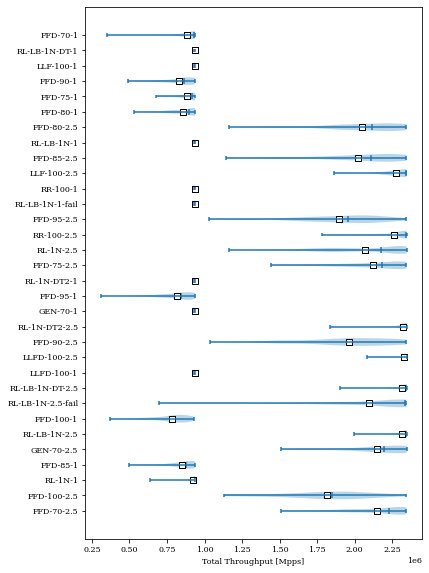

In [58]:
evaldqn.plot_throughput(results)
plt.show()

In [681]:
reload(evaldqn)
reload(plutils)

<module 'evaluation.plotutils' from '/opt/project/evaluation/plotutils.py'>

In [354]:
(2345672.7 - 2.5e6) / 2.5e6, 928474.5 - 1e6

(-0.061730919999999925, -71525.5)

In [673]:
os.mkdir('/opt/project/Graphs/tnsm')

2345672.7
2345262.7
2346314.4
2345594.5
2343739.5
2345654.4
2345890.4


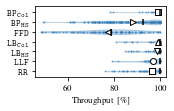

In [727]:
evaldqn.plot_throughput_paper(results_rc, '2.5', False, 0.65)
plt.subplots_adjust(left=0.175, top=0.98, right=0.99, bottom=0.275)
plt.savefig(f'/opt/project/Graphs/tnsm/throughput-2.5mpps.{format}')
plt.show()
plt.close('all')

937664.3
937694.7
937717.4
937726.3
928474.5
937800.1
937839.5


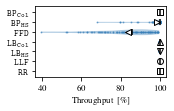

In [728]:
evaldqn.plot_throughput_paper(results_rc, '1', False, 0.65)
plt.subplots_adjust(left=0.175, top=0.98, right=0.99, bottom=0.275)
plt.savefig(f'/opt/project/Graphs/tnsm/throughput-1mpps.{format}')
plt.show()
plt.close('all')

ValueError: zero-size array to reduction operation minimum which has no identity

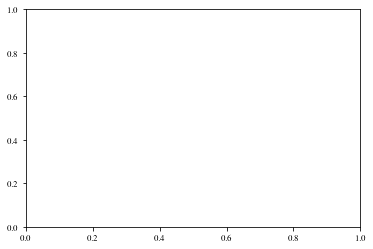

In [729]:
evaldqn.plot_num_used_cores(all_graphs)
evaldqn.plot_num_used_cores_paper(all_graphs, '2.5')
plt.savefig(f'Graphs/used-cores-2.5mpps.{format}')
plt.show()
plt.close('all')

In [ ]:
evaldqn.plot_num_used_cores_paper(all_graphs, '1')
plt.savefig(f'Graphs/used-cores-1mpps.{format}')
plt.show()
plt.close('all')

1.8016475402002583
2.4530849543667435
1.062510020978745
0.818272286997011
8.362051190112542
4.565738292552878
0.8086342750565135


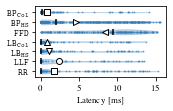

In [788]:
evaldqn.plot_latency_paper(latencies_rc, '2.5', False, 0.65)
plt.subplots_adjust(left=0.175, top=0.98, right=0.99, bottom=0.275)
plt.savefig(f'/opt/project/Graphs/tnsm/latencies-2.5mpps.{format}')
plt.show()
plt.close('all')

7.382694240381551e-05
7.393521642687359e-05
8.997758555594417e-05
7.873416078835531e-05
1.6778277243295288
0.09024721724737207
0.0003611051033766704


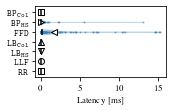

In [731]:
evaldqn.plot_latency_paper(latencies_rc, '1', False, 0.65)
plt.subplots_adjust(left=0.175, top=0.98, right=0.99, bottom=0.275)
plt.savefig(f'/opt/project/Graphs/tnsm/latencies-1mpps.{format}')
plt.show()
plt.close('all')

4230.331960879043
3209.577558992821
3065.6400702739033
4229.655895863949
2131.0389405714263
2169.922451738829
2892.564564177626


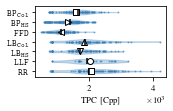

In [732]:
evaldqn.plot_total_packet_cost_paper(total_cost_per_packet_rc, '2.5', False, 0.65)
plt.subplots_adjust(left=0.175, top=0.98, right=0.99, bottom=0.275)
plt.savefig(f'/opt/project/Graphs/tnsm/total-cost-pp-2.5mpps.{format}')
plt.show()
plt.close('all')

10637.172687850354
10635.726371766981
5309.367171700108
8641.736566027703
2040.4483644136901
2759.639519399818
3154.061947927154


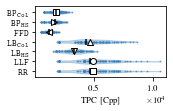

In [733]:
evaldqn.plot_total_packet_cost_paper(total_cost_per_packet_rc, '1', False, 0.65)
plt.subplots_adjust(left=0.175, top=0.98, right=0.99, bottom=0.275)
plt.savefig(f'/opt/project/Graphs/tnsm/total-cost-pp-1mpps.{format}')
plt.show()
plt.close('all')

In [104]:
reload(evaldqn)

<module 'scripts.plot_results' from '/opt/project/scripts/plot_results.py'>

In [ ]:
for k, graphs in all_graphs.items():
    evaldqn.plot_individual_core_utilization(graphs, k)

# Baseline Measurements

In [ ]:
def make_fill_between_lines(df: pd.DataFrame) -> Tuple[List[float], List[float]]:
    acti_x = []
    acti_y = []
    ticks = df.ticks
    for t1, t2 in zip(ticks.iloc[:-1].values, ticks.iloc[1:].values):
        delta = (t2 - t1) / 2.2e6
        if delta < 0.2:
            if len(acti_x) == 0:
                acti_x.append(t1)
                acti_y.append(1)
            acti_x.append(t2)
            acti_y.append(1)
        else:
            acti_x.extend([t1, t2, t2])
            acti_y.extend([0, 0, 1])
    return acti_x, acti_y

In [2]:
bpath = '/opt/project/data/basic-cfs'

In [3]:
df_short = pd.read_csv(os.path.join(bpath, 'stats-short-worker-3.csv'), sep=',')
df_short2 = pd.read_csv(os.path.join(bpath, 'stats-second-short-worker-3.csv'), sep=',')
df_long = pd.read_csv(os.path.join(bpath, 'stats-long-worker-3.csv'), sep=',')
df_short = df_short.loc[df_short.ticks > 0]
df_short2 = df_short2.loc[df_short2.ticks > 0]
df_long = df_long.loc[df_long.ticks > 0]
yield_short = (df_short - df_long.ticks.iloc[0]) / 2.2e6
yield_short2 = (df_short2 - df_long.ticks.iloc[0]) / 2.2e6
yield_long = (df_long - df_long.ticks.iloc[0]) / 2.2e6


diff_short = yield_short.diff().dropna()
diff_long = yield_long.diff().dropna()
diff_short2 = yield_short2.diff().dropna()

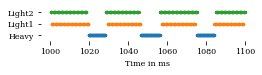

In [27]:
ref = np.min([df_long.ticks.values[0], df_short.ticks.values[0], df_short2.ticks.values[0]])
s = ref + 2.2e9
e = s + 0.1 * 2.2e9
# x_long = (df_long.ticks.loc[df_long.ticks.values < ref + 0.25 * 2.2e9].values - ref) / 2.2e6
tmp = df_long.loc[df_long.ticks.values > s]
x_long = (tmp.ticks.loc[tmp.ticks.values < e] - ref) / 2.2e6
y_long = np.repeat(1, x_long.size)
# x_short = (df_short.ticks.loc[df_short.ticks.values < ref + 0.25 * 2.2e9].values - ref) / 2.2e6
tmp = df_short.loc[df_short.ticks.values > s]
x_short = (tmp.ticks.loc[tmp.ticks.values < e] - ref) / 2.2e6
y_short = np.repeat(2, x_short.size)
# x_short2 = (df_short2.ticks.loc[df_short2.ticks.values < ref + 0.25 * 2.2e9].values - ref) / 2.2e6
tmp = df_short2.loc[df_short2.ticks.values > s]
x_short2 = (tmp.ticks.loc[tmp.ticks.values < e] - ref) / 2.2e6
y_short2 = np.repeat(3, x_short2.size)

fig, ax = plutils.get_fig(1, 0.25)
ax.scatter(x_long, y_long, s=5, label='long')
ax.scatter(x_short, y_short, s=5, label='short')
ax.scatter(x_short2, y_short2, s=5, label='short2')
ax.set_yticks([1 ,2 ,3])
ax.set_ylim(0.5, 3.5)
ax.set_yticklabels(['Heavy', 'Light1', 'Light2'])
ax.set_xlabel("Time in ms")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
# ax.legend(frameon=False)
plt.subplots_adjust(left=0.14, bottom=0.45, right=1, top=1)
# plt.tight_layout()
plt.savefig('/opt/project/Graphs/activity-1ms-no-yield.pdf')
plt.show()

In [15]:
plt.subplots_adjust?

In [ ]:
ax = plt.subplot()
ax.violinplot(
    dataset=[
        diff_short.ticks.loc[diff_short.ticks.values > 0.15].values,
        diff_short2.ticks.loc[diff_short2.ticks.values > 0.15].values,
        diff_long.ticks.loc[diff_long.ticks.values > 0.15].values,
    ],
    positions=[1, 2, 3],
    showextrema=False,
    vert=False
)
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(["Light", "Light", "Heavy"])
ax.set_xlabel("Inactive time [ms]")
plt.tight_layout()
plt.savefig("Graphs/inactive-times-1-ms-no-yield.png")
plt.show()

In [ ]:
ref = np.min([df_long.ticks.values[0], df_short.ticks.values[0], df_short2.ticks.values[0]])
s = ref + 1.10 * 2.2e9
e = s + 0.075 * 2.2e9
first_ms = (int(s / 2.2e6) + 1) * 2.2e6
xticks = np.arange(first_ms, e, 25 * 2.2e6)

fig, ax = plutils.get_fig(1)
tmp = df_long.loc[np.logical_and(df_long.ticks.values > s, df_long.ticks.values < e)]
acti_x, acti_y = make_fill_between_lines(tmp)
ax.fill_between(acti_x, np.zeros(len(acti_y)), acti_y, fc=plutils.COLORS[0], hatch="+++", label='Heavy')

tmp = df_short.loc[np.logical_and(df_short.ticks.values > s, df_short.ticks.values < e)]
acti_x, acti_y = make_fill_between_lines(tmp)
ax.fill_between(acti_x, np.zeros(len(acti_y)), acti_y, fc=plutils.COLORS[1], hatch="***", label='Light1')

tmp = df_short2.loc[np.logical_and(df_short2.ticks.values > s, df_short2.ticks.values < e)]
acti_x, acti_y = make_fill_between_lines(tmp)
ax.fill_between(acti_x, np.zeros(len(acti_y)), acti_y, fc=plutils.COLORS[2], hatch="...", label='Light2')

ax.set_yticks([])
ax.set_xticks(xticks)
ax.set_xticklabels(25 * np.arange(len(xticks)))
ax.set_xlabel("Time [ms]")
ax.set_xlim(xticks[0], xticks[-1])
ax.set_ylim(0, 1)
leg = plt.legend(frameon=False, loc='upper left', bbox_to_anchor=(0.0, 1.175), ncol=3)
for patch in leg.get_patches():
    patch.set_height(patch.get_height() * 2)
plt.tight_layout()
plt.savefig("Graphs/process-activity-basic-cfs-yield.pdf")
plt.show()
plt.close('all')

# Linear Regression Model

In [498]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as skm

In [493]:
def lin_reg_ds(flat_graphs: List[nx.Graph]) -> List[np.array]:
    all_features = []
    for g in flat_graphs: #all_graphs['RL-1N-2.5']:
        for u, attrs in g.nodes(data=True):
            if attrs['node_type'] == 'cpu': # and not attrs['hard_overload']:
                cpu_features = np.zeros(11)
                cpu_features[0] = float(np.sum([1 if g.nodes[m]['node_type'] == 'vnf' else 0 for m in g.neighbors(u)]))
                cpu_features[1] = float(np.min([g.nodes[m]['ratio'] if g.nodes[m]['node_type'] == 'vnf' else 1e9 for m in g.neighbors(u)]))
                cpu_features[2] = float(np.max([g.nodes[m]['ratio'] if g.nodes[m]['node_type'] == 'vnf' else 0 for m in g.neighbors(u)]))
                cpu_features[3] = np.abs(1 - cpu_features[1] / cpu_features[2])
                cpu_features[4] = attrs['arrival_rate']
                cpu_features[5] = attrs['cost']
                cpu_features[6] = attrs['demand'] / 2.2e9
                for v in g.neighbors(u):
                    if g.nodes[v]['node_type'] == 'vnf':
                        node_features = cpu_features.copy()
                        node_features[7] = g.nodes[v]['arrival_rate']
                        node_features[8] = g.nodes[v]['cost']
                        node_features[9] = g.nodes[v]['demand']
                        node_features[10] = g.nodes[v]['throughput']
                        all_features.append(node_features)
    df = pd.DataFrame(
        all_features,
        columns=['num_nfs', 'min_ratio', 'max_ratio', 'ratioratio',
                 'cpu_arrival_rate', 'cpu_cost', 'cpu_demand',
                 'vnf_arrival_rate', 'vnf_cost', 'vnf_demand', 'throughput']
    )
    return df

In [479]:
train_files, val_files = grutils.dset_graph_files()
train_graphs = [dutils.load_graph(f) for f in train_files]
val_graphs = [dutils.load_graph(f) for f in val_files]

In [545]:
df_train = lin_reg_ds(train_graphs)
df_val = lin_reg_ds(val_graphs)

/tmp/ipykernel_60/2255059030.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  cpu_features[3] = np.abs(1 - cpu_features[1] / cpu_features[2])


In [546]:
scale = df_train.throughput.max()

In [547]:
scaler = MinMaxScaler().fit(df_train.iloc[:, :-1].values)
X_train = scaler.transform(df_train.iloc[:, :-1].values)
X_val = scaler.transform(df_val.iloc[:, :-1].values)
z_train = df_train.iloc[:, -1].values / scale
z_val = df_val.iloc[:, -1].values
lr = LinearRegression().fit(X_train, z_train)

In [548]:
y = lr.predict(X_val) * scale

In [504]:
ecdf_lr = np.cumsum(pd.Series((y-z)).value_counts(normalize=True).sort_index())

In [550]:
np.mean(np.abs((y-z)) / z)

1.4928995136094645

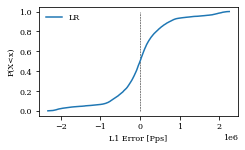

In [503]:
fig, ax = plutils.get_fig(1)
ax.plot([0, 0], [0, 1], linestyle='--', color='black', linewidth=0.5)
ax.plot(ecdf_lr.index.values, ecdf_lr.values, label='DT-LR')
ax.set_xlabel("L1 Error [Pps]")
ax.set_ylabel("P(X<x)")
ax.legend(frameon=False)
plt.tight_layout()

In [544]:
np.sum(ecdf_lr.index.values * ecdf_lr.values)

1848858287.341565

# Logistic Regression Model

In [530]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn.metrics as skm

In [693]:
def log_reg_x(flat_graphs):
    all_features = []
    for g in flat_graphs: #all_graphs['RL-1N-2.5']:
        for u, attrs in g.nodes(data=True):
            if attrs['node_type'] == 'cpu' and 'soft_overload' in attrs: # and not attrs['hard_overload']:
                node_features = np.zeros(8)
                node_features[0] = float(np.sum([1 if g.nodes[m]['node_type'] == 'vnf' else 0 for m in g.neighbors(u)]))
                node_features[1] = float(np.min([g.nodes[m]['ratio'] if g.nodes[m]['node_type'] == 'vnf' else 1e9 for m in g.neighbors(u)]))
                node_features[2] = float(np.max([g.nodes[m]['ratio'] if g.nodes[m]['node_type'] == 'vnf' else 0 for m in g.neighbors(u)]))
                node_features[3] = np.abs(1 - node_features[1] / node_features[2])
                node_features[4] = attrs['arrival_rate']
                node_features[5] = attrs['cost']
                node_features[6] = attrs['demand'] / 2.2e9
                node_features[7] = attrs['hard_overload']
                all_features.append(node_features)
    return pd.DataFrame(
        np.row_stack(all_features),
        columns=['num_vnfs', 'min_ratio', 'max_ratio', 
                 'ratioratio', 'rate', 'cost', 'demand',
                 'overlaod'])

In [694]:
def trim_samples(df_train):
    mask = np.logical_not(np.logical_and(df_train.demand.values > 100.0, df_train.overlaod.values == 0))
    return df_train.loc[mask]

In [695]:
df_train = trim_samples(log_reg_x(train_graphs))
df_val = trim_samples(log_reg_x(val_graphs))

In [696]:
features = ['num_vnfs', 'rate', 'cost', 'demand', 'min_ratio', 'max_ratio']
X = df_train.loc[:, features].values
scaler = MinMaxScaler().fit(X)
X_train = scaler.transform(X)
X_val = scaler.transform(df_val.loc[:, features].values)
z_train = df_train.values[:, -1]
z_val = df_val.values[:, -1]

model = LogisticRegression(penalty='l1', solver='liblinear')

weights = z_train * 10 + 1
# weights = np.ones(X.shape[0])
model.fit(X_train, z_train, sample_weight=weights)
y_train = model.predict(X_train)
y_val = model.predict(X_val)
# y[tmp2.demand.values > 0.8] = 1
print(skm.accuracy_score(z_train, y_train))
print(skm.precision_score(z_train, y_train))
print(skm.recall_score(z_train, y_train))
print()
print(skm.accuracy_score(z_val, y_val))
print(skm.precision_score(z_val, y_val))
print(skm.recall_score(z_val, y_val))
print(pd.DataFrame(np.row_stack((model.coef_, scaler.data_min_, scaler.data_max_)), columns=features, index=['coef', 'min', 'max']))
print("Intercept", model.intercept_)

print(features)
print(model.coef_)
print(scaler.data_min_)
print(scaler.data_max_)

0.8860481702968124
0.6178846515123051
0.987094837935174

0.8813366674244146
0.6199701937406855
0.985781990521327
       num_vnfs          rate          cost     demand  min_ratio  max_ratio
coef  11.560948  7.056595e+00      2.821561  24.975950  -6.003867   7.778854
min    1.000000  3.554800e+04    175.000000   0.008081   0.004017   0.110489
max   15.000000  7.830358e+06  25574.000000   2.497223   1.000000   1.000000
Intercept [-11.80524334]
['num_vnfs', 'rate', 'cost', 'demand', 'min_ratio', 'max_ratio']
[[11.56094786  7.05659499  2.82156143 24.9759497  -6.00386695  7.77885372]]
[1.00000000e+00 3.55480000e+04 1.75000000e+02 8.08135091e-03
 4.01684110e-03 1.10489350e-01]
[1.50000000e+01 7.83035800e+06 2.55740000e+04 2.49722312e+00
 1.00000000e+00 1.00000000e+00]


In [697]:
precs = []
recs = []
accs = []
for i in range(11):
    model = LogisticRegression(penalty='l1', solver='liblinear')
    weights = z_train * i + 1
    # weights = np.ones(X.shape[0])
    model.fit(X_train, z_train, sample_weight=weights)
    y_val = model.predict(X_val)
    accs.append(skm.accuracy_score(z_val, y_val))
    precs.append(skm.precision_score(z_val, y_val))
    recs.append(skm.recall_score(z_val, y_val))

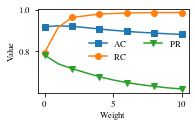

In [759]:
fig, ax = plutils.get_fig(0.75)
# fig.set_figheight(fig.get_figheight() * 1.5)
ax.plot(np.array(accs), label="AC", marker='s', markevery=2)
ax.plot(np.array(recs), label='RC', marker='o', markevery=2)
ax.plot(np.array(precs), label='PR', marker='v', markevery=2)
ax.set_xlabel("Weight")
ax.set_ylabel("Value")
ax.set_xticks([0, 5, 10])
ax.set_xticklabels([0, 5, 10])
plt.legend(frameon=False, ncol=2)
plt.subplots_adjust(left=0.18, right=0.99, top=0.98, bottom=0.25)
plt.savefig("/opt/project/Graphs/tnsm/classification-metrics-log-reg.pdf")

In [572]:
recs

[0.7938388625592417,
 0.9146919431279621,
 0.9620853080568721,
 0.9703791469194313,
 0.9786729857819905,
 0.981042654028436,
 0.9834123222748815,
 0.9845971563981043,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327,
 0.985781990521327]

In [625]:
recs[8], precs[8], accs[8]

(0.985781990521327, 0.6322188449848024, 0.8872471016140032)

# Digital Twin

In [215]:
import scripts.eval_perfmodel as evpfm
import torch
import sklearn.metrics as skm

In [256]:
import layers.vnfmodel

In [269]:
reload(evpfm)
reload(layers.vnfmodel)

<module 'layers.vnfmodel' from '/opt/project/layers/vnfmodel.py'>

In [205]:
os.listdir('/opt/project/data/nas/digital-twin-dnn-models')

['DenseGatNewSpace-sfc_latency',
 'DenseGatNewSpace-sfc_throughput',
 'DenseGatNewSpace-vnf_throughput',
 'GoldenSamplesDenseGatSoftFailure-new-space']

## Tipping Point

In [621]:
c

{'batch_size': 294,
 'model_config': {'attn_module_config': {'attention_class': 'Gat',
   'dim_hidden': 24,
   'dim_in': None,
   'dim_linear': None,
   'dim_out': 21,
   'num_heads': 5},
  'dim_hiddens': [60, 41],
  'dim_in': 27,
  'dim_initial': 16,
  'dim_out': 2,
  'num_attn_modules': 3},
 'optimizer': {'lr': 1.591408722500197e-05, 'weight_decay': 0},
 'seed': 1,
 'target': 'soft_overload'}

In [620]:
with open(os.path.join(ldir, 'params.json'), 'r') as fh:
    c = json.load(fh)

In [618]:
a = evpfm.load_tune_result('/opt/project/data/nas/digital-twin-dnn-models/GoldenSamplesDenseGatSoftFailure-new-space')

In [619]:
ldir = str(a.get_best_logdir(metric='val_loss', mode='min'))
exp_name = os.path.split(os.path.split(ldir)[0])[1]
fig_dir = os.path.join('/opt/project/Graphs', exp_name)
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [622]:
step_results = evpfm.get_json_result_data(ldir)

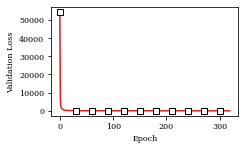

In [623]:
fig, ax = plutils.get_fig(1)
ax.plot([a['val_loss'] for a in step_results], c=plutils.COLORS[0],
        marker=plutils.MARKER[0], markevery=30, markeredgecolor='black',
        markerfacecolor='white')
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'validation-loss.pdf'))
plt.show()
plt.close(fig)

In [210]:
model = evpfm.load_best_model(a)
dset = evpfm.GraphDataset.from_hdf5('/opt/project/data/nas/graphs-golden-samples/val-set.h5',
                                    target='soft_overload')
loader = evpfm.DataLoader(dset, batch_size=200, shuffle=True)

In [213]:
y = np.array([])
z = np.array([])
for i, sample in enumerate(loader):
    print(f"Batch {i}")
    DEV = 'cpu'
    with torch.no_grad():
        prediction = model(
            node_features=sample['node_features'].to(DEV),
            query_idxs=sample['query_idx'].to(DEV),
            masks=sample['masks'].to(DEV),
            adj=sample['adj'].to(DEV)
        )
        prediction = torch.softmax(prediction, dim=-1)
        y = np.concatenate([y, torch.argmax(prediction, dim=-1).numpy()])
        z = np.concatenate([z, torch.argmax(sample['target'], dim=-1).numpy()])

Batch 0
Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16
Batch 17
Batch 18
Batch 19
Batch 20
Batch 21


NameError: name 'skm' is not defined

In [216]:
acc = skm.accuracy_score(y, z)
rec = skm.recall_score(y, z)
prc = skm.precision_score(y, z)
msg = json.dumps(
    {
        'Logdir': ldir,
        'Accuracy': acc,
        'Recall': rec,
        'Precision': prc
    },
    indent=1
)
print(msg)
with open(os.path.join(fig_dir, 'stats.txt'), 'w') as fh:
    fh.write(msg)

{
 "Logdir": "/opt/project/data/nas/digital-twin-dnn-models/GoldenSamplesDenseGatSoftFailure-new-space/GatTrainable_a0e1a_00554",
 "Accuracy": 0.8708797453966811,
 "Recall": 0.6191135734072022,
 "Precision": 0.9802631578947368
}


In [401]:
reload(grutils)
reload(evaldqn)

<module 'scripts.plot_results' from '/opt/project/scripts/plot_results.py'>

In [402]:
z_sim, y_sim = evaldqn.get_simulated_soft_overload()

In [403]:
skm.accuracy_score(z_sim, y_sim), skm.precision_score(z_sim, y_sim), skm.recall_score(z_sim, y_sim)

(0.8068306010928962, 0.48549946294307195, 0.6647058823529411)

In [404]:
z_sim

array([False, False, False, ..., False, False, False])

In [405]:
y_sim

array([False, False, False, ..., False, False, False])

## Sensitivity analysis

Evaluate model with weight 1


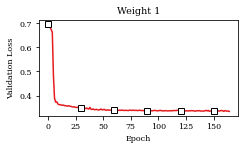

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW1-soft_overload/GatTrainable_18701_00005/params.json
	Batch 0
	Batch 5
0.9676826846703733 0.7717860395137982 0.9339864371198946
Evaluate model with weight 2


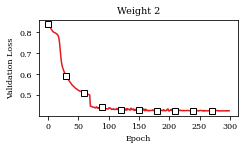

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW2-soft_overload/GatTrainable_cfa34_00009/params.json
	Batch 0
	Batch 5
0.9666603343465046 0.7743285399071749 0.9346892966842562
Evaluate model with weight 3


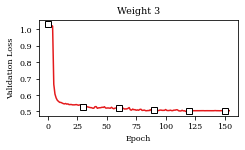

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW3-soft_overload/GatTrainable_8741e_00004/params.json
	Batch 0
	Batch 5
0.9660870356882738 0.776716439759918 0.9353998584571833
Evaluate model with weight 4


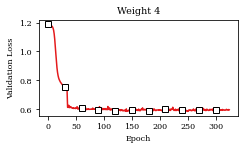

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW4-soft_overload/GatTrainable_84dec_00000/params.json
	Batch 0
	Batch 5
0.9659527972027973 0.7781768247596915 0.9358635185822748
Evaluate model with weight 5


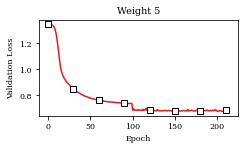

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW5-soft_overload/GatTrainable_c1506_00001/params.json
	Batch 0
	Batch 5
0.9662491593813046 0.7778642484942817 0.9358037169020589
Evaluate model with weight 6


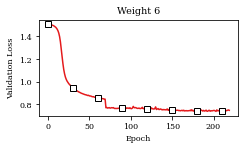

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW6-soft_overload/GatTrainable_20847_00007/params.json
	Batch 0
	Batch 5
0.966523639896373 0.7784878223729256 0.9360504145269023
Evaluate model with weight 7


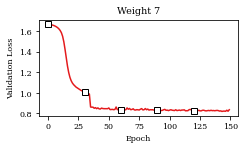

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW7-soft_overload/GatTrainable_4a3ec_00001/params.json
	Batch 0
	Batch 5
0.9667785758900687 0.778528764539453 0.9361015124907948
Evaluate model with weight 8


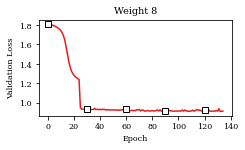

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW8-soft_overload/GatTrainable_b3460_00002/params.json
	Batch 0
	Batch 5
0.9674683353437877 0.7769503224048678 0.9356802375556771
Evaluate model with weight 9


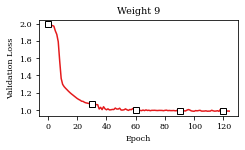

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW9-soft_overload/GatTrainable_e7cd8_00009/params.json
	Batch 0
	Batch 5
0.9681122448979592 0.7756204379562044 0.9353322907931615
Evaluate model with weight 10


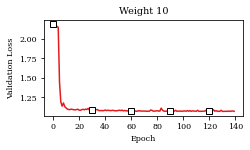

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW10-soft_overload/GatTrainable_ea1c3_00008/params.json
	Batch 0
	Batch 5
0.9685031038374717 0.7746931866271689 0.9350798432381844
Evaluate model with weight 11


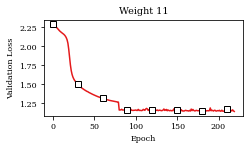

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW11-soft_overload/GatTrainable_8299d_00003/params.json
	Batch 0
	Batch 5
0.9689379442318207 0.7739232490856488 0.9348856319111407
Evaluate model with weight 12


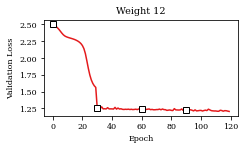

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW12-soft_overload/GatTrainable_bb0f3_00001/params.json
	Batch 0
	Batch 5
0.9693465005302226 0.7736517760321616 0.9348542928980669
Evaluate model with weight 13


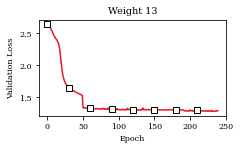

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW13-soft_overload/GatTrainable_ea904_00005/params.json
	Batch 0
	Batch 5
0.9699240864642306 0.7727575602255253 0.9346380822191844
Evaluate model with weight 14


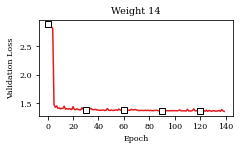

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW14-soft_overload/GatTrainable_965bc_00003/params.json
	Batch 0
	Batch 5
0.9704375 0.771930696761043 0.9344341945013086
Evaluate model with weight 15


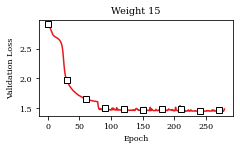

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW15-soft_overload/GatTrainable_1dbfc_00001/params.json
	Batch 0
	Batch 5
0.9708616917841517 0.7706388828594168 0.934058943204651
Evaluate model with weight 16


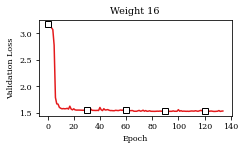

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW16-soft_overload/GatTrainable_38e5e_00006/params.json
	Batch 0
	Batch 5
0.9712630085146642 0.7693676814988291 0.9336855395251346
Evaluate model with weight 17


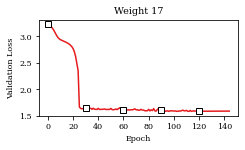

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW17-soft_overload/GatTrainable_b2ded_00008/params.json
	Batch 0
	Batch 5
0.9715856748042376 0.7690852741442961 0.9336361086410322
Evaluate model with weight 18


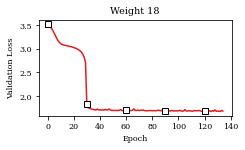

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW18-soft_overload/GatTrainable_128d2_00004/params.json
	Batch 0
	Batch 5
0.971975987432675 0.7677768175674179 0.933246103745057
Evaluate model with weight 19


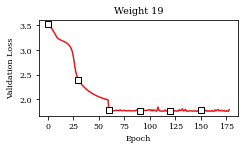

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW19-soft_overload/GatTrainable_cd187_00003/params.json
	Batch 0
	Batch 5
0.9724015317286652 0.766053266678159 0.9327167879155586
Evaluate model with weight 20


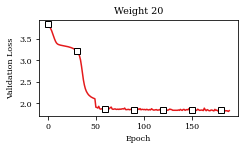

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW20-soft_overload/GatTrainable_e67bf_00008/params.json
	Batch 0
	Batch 5
0.9727263023057217 0.7652579202620142 0.9324898483054692


In [659]:
dset = evpfm.GraphDataset.from_hdf5('/opt/project/data/nas/graphs-golden-samples/val-set.h5',
                                    target='soft_overload')
results = {}
for weight in range(1, 21):
    print(f"Evaluate model with weight {weight}")
    loader = evpfm.DataLoader(dset, batch_size=500)
    exp_dir = f'/opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpacePbtW{weight}-soft_overload/'
    a = evpfm.load_tune_result(exp_dir)
    
    ldir = str(a.get_best_logdir(metric='val_loss', mode='min'))
    step_results = evpfm.get_json_result_data(ldir)
    fig, ax = plutils.get_fig(1)
    ax.plot([a['val_loss'] for a in step_results], c=plutils.COLORS[0],
            marker=plutils.MARKER[0], markevery=30, markeredgecolor='black',
            markerfacecolor='white')
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Validation Loss")
    ax.set_title(f"Weight {weight}")
    # ax.set_yscale('log')
    plt.tight_layout()
    plt.show()
    plt.close(fig)
    
    model = evpfm.load_best_model(a)
    y = np.array([])
    z = np.array([])
    for i, sample in enumerate(loader):
        if i % 5 == 0:
            print(f"\tBatch {i}")
        DEV = 'cpu'
        with torch.no_grad():
            prediction = model(
                node_features=sample['node_features'].to(DEV),
                query_idxs=sample['query_idx'].to(DEV),
                masks=sample['masks'].to(DEV),
                adj=sample['adj'].to(DEV)
            )
            prediction = torch.softmax(prediction, dim=-1)
            y_so = np.concatenate([y_so, torch.argmax(prediction, dim=-1).numpy()])
            z_so = np.concatenate([z_so, torch.argmax(sample['target'], dim=-1).numpy()])
    results[weight] = {
        'precision': skm.precision_score(y_so, z_so),
        'recall': skm.recall_score(y_so, z_so),
        'accuracy': skm.accuracy_score(y_so, z_so)
    }
    print(results[weight]['precision'], results[weight]['recall'], results[weight]['accuracy'])

In [662]:
sample['node_features'].shape

torch.Size([399, 68, 27])

In [660]:
results

{1: {'precision': 0.9676826846703733,
  'recall': 0.7717860395137982,
  'accuracy': 0.9339864371198946},
 2: {'precision': 0.9666603343465046,
  'recall': 0.7743285399071749,
  'accuracy': 0.9346892966842562},
 3: {'precision': 0.9660870356882738,
  'recall': 0.776716439759918,
  'accuracy': 0.9353998584571833},
 4: {'precision': 0.9659527972027973,
  'recall': 0.7781768247596915,
  'accuracy': 0.9358635185822748},
 5: {'precision': 0.9662491593813046,
  'recall': 0.7778642484942817,
  'accuracy': 0.9358037169020589},
 6: {'precision': 0.966523639896373,
  'recall': 0.7784878223729256,
  'accuracy': 0.9360504145269023},
 7: {'precision': 0.9667785758900687,
  'recall': 0.778528764539453,
  'accuracy': 0.9361015124907948},
 8: {'precision': 0.9674683353437877,
  'recall': 0.7769503224048678,
  'accuracy': 0.9356802375556771},
 9: {'precision': 0.9681122448979592,
  'recall': 0.7756204379562044,
  'accuracy': 0.9353322907931615},
 10: {'precision': 0.9685031038374717,
  'recall': 0.77469

## Throughput VNF

In [699]:
reload(evpfm)
reload(layers.vnfmodel)

<module 'layers.vnfmodel' from '/opt/project/layers/vnfmodel.py'>

In [700]:
a = evpfm.load_tune_result('/opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpace-vnf_throughput')

In [701]:
ldir = str(a.get_best_logdir(metric='val_loss', mode='min'))
exp_name = os.path.split(os.path.split(ldir)[0])[1]
fig_dir = os.path.join('/opt/project/Graphs', exp_name)
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [702]:
step_results = evpfm.get_json_result_data(ldir)

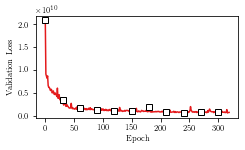

In [703]:
fig, ax = plutils.get_fig(1)
ax.plot([a['val_loss'] for a in step_results], c=plutils.COLORS[0],
        marker=plutils.MARKER[0], markevery=30, markeredgecolor='black',
        markerfacecolor='white')
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'validation-loss.pdf'))
plt.show()
plt.close(fig)

In [704]:
model = evpfm.load_best_model(a)
dset = ds.GraphDataset.from_hdf5('/opt/project/data/nas/graphs-golden-samples/val-set.h5',
                                    target='vnf_throughput')
loader = evpfm.DataLoader(dset, batch_size=200, shuffle=True)

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpace-vnf_throughput/GatTrainable_83837_00476/params.json


In [614]:
z_sim, y_sim = evaldqn.get_simulated_rate_validation()

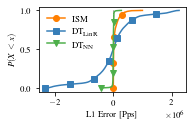

In [758]:
fig, ax = plutils.get_fig(0.75)
ecdf = np.cumsum(pd.Series((y-z)).value_counts(normalize=True).sort_index())
ecdf_s = np.cumsum(pd.Series((y_sim * 0.95 - z_sim)).value_counts(normalize=True).sort_index())
ax.plot([0, 0], [0, 1], linestyle='--', color='black', linewidth=0.5)
ax.plot(ecdf_s.index.values, ecdf_s.values, label='ISM', color=plutils.COLORS[4], marker='o', markevery=0.15)
ax.plot(ecdf_lr.index.values, ecdf_lr.values, label='DT\\textsubscript{{LinR}}', color=plutils.COLORS[1], marker='s', markevery=0.15)
ax.plot(ecdf.index.values, ecdf.values, label='DT\\textsubscript{{NN}}', color=plutils.COLORS[2], marker='v', markevery=0.15)
ax.set_xlabel("L1 Error [Pps]")
ax.set_ylabel("$P(X < x)$")
#ax.set_xticks([-2, -1, 0, 1])
#ax.set_xticklabels([-200, -100, 0, 100])
ax.legend(frameon=False, loc='upper left')
plt.subplots_adjust(left=0.2, right=0.99, top=0.99, bottom=0.25)
plt.savefig("/opt/project/Graphs/tnsm/l1-error-vnf_throughput.pdf")

In [756]:
ax.legend?

In [472]:
np.mean(np.abs(z_sim-y_sim*0.95) / z_sim)

0.15035531150827547

In [474]:
np.mean(np.abs(z-y) / z)

0.02531117914514932

In [440]:
reload(grutils)
reload(evaldqn)
reload(ds)
reload(vnfmod)

<module 'layers.vnfmodel' from '/opt/project/layers/vnfmodel.py'>

## Throughput SFC

In [441]:
a = evpfm.load_tune_result('/opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpace-sfc_throughput')

ValueError: /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpace-sfc_throughput is not a valid directory.

In [197]:
ldir = str(a.get_best_logdir(metric='val_loss', mode='min'))
exp_name = os.path.split(os.path.split(ldir)[0])[1]
fig_dir = os.path.join('/opt/project/Graphs', exp_name)
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [198]:
step_results = evpfm.get_json_result_data(ldir)

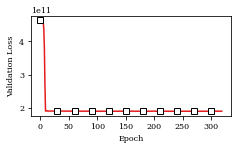

In [199]:
fig, ax = plutils.get_fig(1)
ax.plot([a['val_loss'] for a in step_results], c=plutils.COLORS[0],
        marker=plutils.MARKER[0], markevery=30, markeredgecolor='black',
        markerfacecolor='white')
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'validation-loss.pdf'))
plt.show()
plt.close(fig)

In [231]:
model = evpfm.load_best_model(a)
dset = evpfm.GraphDataset.from_hdf5('/opt/project/data/nas/graphs-golden-samples/val-set.h5',
                                    target='sfc_throughput')
loader = evpfm.DataLoader(dset, batch_size=200, shuffle=True)

In [232]:
y = np.array([])
z = np.array([])
for i, sample in enumerate(loader):
    print(f"Batch {i}")
    DEV = 'cpu'
    with torch.no_grad():
        prediction = model(
            node_features=sample['node_features'].to(DEV),
            query_idxs=sample['query_idx'].to(DEV),
            masks=sample['masks'].to(DEV),
            adj=sample['adj'].to(DEV)
        )
        prediction = torch.softmax(prediction, dim=-1)
        y = np.concatenate([y, prediction.numpy().flatten() * model.config.nn_scale])
        z = np.concatenate([z, sample['target'].numpy().flatten()])

Batch 0
Batch 1
Batch 2
Batch 3
Batch 4
Batch 5


In [234]:
z

array([171877.140625, 289277.8125  ,  87463.40625 , ..., 660914.875   ,
       292820.9375  , 992250.6875  ])

## Latency

In [442]:
a = evpfm.load_tune_result('/opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpace-sfc_latency')

In [443]:
ldir = str(a.get_best_logdir(metric='val_loss', mode='min'))
exp_name = os.path.split(os.path.split(ldir)[0])[1]
fig_dir = os.path.join('/opt/project/Graphs', exp_name)
if not os.path.exists(fig_dir):
    os.mkdir(fig_dir)

In [444]:
step_results = evpfm.get_json_result_data(ldir)

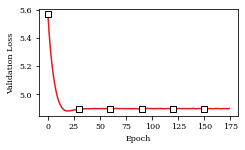

In [445]:
fig, ax = plutils.get_fig(1)
ax.plot([a['val_loss'] for a in step_results], c=plutils.COLORS[0],
        marker=plutils.MARKER[0], markevery=30, markeredgecolor='black',
        markerfacecolor='white')
ax.set_xlabel("Epoch")
ax.set_ylabel("Validation Loss")
# ax.set_yscale('log')
plt.tight_layout()
plt.savefig(os.path.join(fig_dir, 'validation-loss.pdf'))
plt.show()
plt.close(fig)

In [447]:
model = evpfm.load_best_model(a)
dset = ds.GraphDataset.from_hdf5('/opt/project/data/nas/graphs-golden-samples/val-set.h5',
                                    target='sfc_latency')
loader = evpfm.DataLoader(dset, batch_size=200, shuffle=True)

Load:  /opt/project/data/nas/digital-twin-dnn-models/DenseGatNewSpace-sfc_latency/GatTrainable_2e030_00035/params.json


In [448]:
y = np.array([])
z = np.array([])
for i, sample in enumerate(loader):
    print(f"Batch {i}")
    DEV = 'cpu'
    with torch.no_grad():
        prediction = model(
            node_features=sample['node_features'].to(DEV),
            query_idxs=sample['query_idx'].to(DEV),
            masks=sample['masks'].to(DEV),
            adj=sample['adj'].to(DEV)
        )
        y = np.concatenate([y, prediction.numpy().flatten()])
        z = np.concatenate([z, sample['target'].numpy().flatten()])

Batch 0
Batch 1
Batch 2
Batch 3
Batch 4
Batch 5


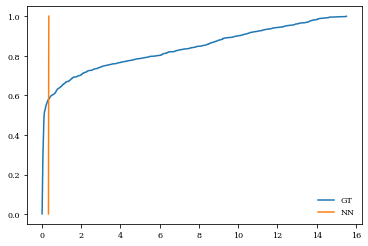

In [456]:
ax = plt.subplot()
ecdf = np.cumsum(pd.Series(z).value_counts(normalize=True).sort_index())
ax.plot(ecdf.index.values, ecdf.values, label='GT')
ecdf = np.cumsum(pd.Series(y).value_counts(normalize=True).sort_index())
ax.plot(ecdf.index.values, ecdf.values, label='NN')
plt.legend(frameon=False)

In [451]:
z, y = np.exp(z), np.exp(y)

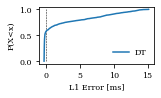

In [455]:
ecdf = np.cumsum(pd.Series((z - y)).value_counts(normalize=True).sort_index())
fig, ax = plutils.get_fig(0.66)
ax.plot([0, 0], [0, 1], linestyle='--', color='black', linewidth=0.5)
ax.plot(ecdf.index.values, ecdf.values, label='DT')
ax.set_xlabel("L1 Error [ms]")
ax.set_ylabel("P(X<x)")
#ax.set_xticks([-2, -1, 0, 1])
#ax.set_xticklabels([-200, -100, 0, 100])
ax.legend(frameon=False)
plt.tight_layout()
plt.savefig("/opt/project/Graphs/l1-error-sfc_latency.pdf")

# ----

In [406]:
with open('/opt/project/Net/TuneVnfPlayerCpuOnlyCpuRatios80BinPackingOneOverNLogRegGoldenSamples/b342c_00004/params.json', 'r') as fh:
    config = json.load(fh)

In [468]:
config

{'_disable_preprocessor_api': False,
 '_fake_gpus': False,
 '_tf_policy_handles_more_than_one_loss': False,
 'action_space': None,
 'actions_in_input_normalized': False,
 'adam_epsilon': 1e-08,
 'batch_mode': 'truncate_episodes',
 'before_learn_on_batch': None,
 'buffer_size': 760000,
 'callbacks': "<class 'ray.rllib.agents.callbacks.DefaultCallbacks'>",
 'clip_actions': False,
 'clip_rewards': None,
 'collect_metrics_timeout': 180,
 'compress_observations': False,
 'create_env_on_driver': False,
 'custom_eval_function': None,
 'custom_resources_per_worker': {},
 'double_q': True,
 'dueling': True,
 'eager_tracing': False,
 'env': 'ONVMVnfPlayerEnv',
 'env_config': {'cycles_per_second': 2200000000.0,
  'load_level': 0.8,
  'machine_count': 21,
  'max_vnfs': 32,
  'max_vnfs_per_sfc': 8,
  'min_vnfs': 5,
  'num_of_sfcs': 5,
  'overload_model_class': 'LogRegActor',
  'overload_model_path': {'LogRegActor': 'static',
   'None': None,
   'PerfModelActor': '/model/does/not/exist',
   'RandomF

In [409]:
config['model']

{'custom_model': 'CPUPlayerDQNModel',
 'custom_model_config': {'cpu_embd': {'dim_out': 8, 'hiddens': [102, 75, 94]},
  'mha_vnf': {'dim_attn_hidden': 26,
   'dim_attn_kv': 3,
   'dim_attn_out': 26,
   'dim_attn_q': 3,
   'dim_fcn': 20,
   'num_attn_heads': 3},
  'q_hiddens': [52]}}

In [410]:
3*(3*26+26) + 3*36*20+20 + 8*102+102 + 102*75+75 + 75*94+94 + 94*8+8 + (16*8+20)*52+52 + 52*16+16

27635

Network should have 27 635 parameters corresponding to 108 Kb

In [411]:
27638*4/1024

107.9609375